<a href="https://colab.research.google.com/github/rammeshulam/ml-exercise/blob/main/Regression_models_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression models

This exercise is focused on regression models. It includes a warm-up exercise with a dummy dataset to practice the basics of regression algorithms and metrics. Following that, it includes a second exercise to explore a bike-sharing dataset and apply different regression models for prediction.
Interesting links:

Classifiers

* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
* [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor)


Metrics
* [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

# 0 Boiler plate

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score

import requests
from io import BytesIO
from zipfile import ZipFile

import matplotlib.pyplot as plt
import seaborn as sns


# 1 Warm up exercise

The exercise is based a dummy data set. The exercise aims to practice the basics of regression algorithms with different metrics.

First, lets create a dataset which shows the relation between temperature (X) and daily sales of of Ice Cream cones (y):

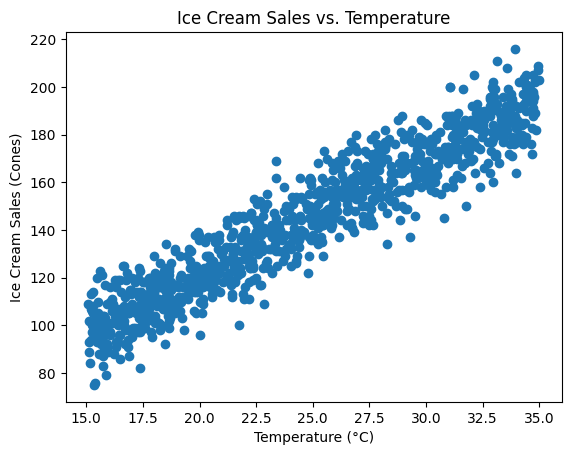

In [ ]:
np.random.seed(42)
temperature = np.random.uniform(15, 35, 1000)  # Temperature in Celsius
ice_cream_sales = np.round(20 + 5 * temperature + np.random.normal(0, 10, 1000))  # Sales in units

df = pd.DataFrame({'Temperature': temperature, 'Sales': ice_cream_sales})

# Visualize
plt.scatter(df['Temperature'], df['Sales'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (Cones)')
plt.title('Ice Cream Sales vs. Temperature')
plt.show()

## 1.1 Regression model
Suppose we'd like to predict daily sales of Ice-cream cones.

1.1.1 Split data to train-set (70%) amd test-set (30%).

1.1.2 Train a regression model and print Mean Squared Error (MSE) on the test set.


In [ ]:
df.head()

,Temperature,Sales
0,22.490802,134.0
1,34.014286,177.0
2,29.639879,172.0
3,26.973170,161.0
4,18.120373,116.0


In [ ]:
# Split the data into training and testing sets.
X = df[['Temperature']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model.
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_linear = model_linear.predict(X_test)

#  Evaluate the model using Mean Squared Error.
mse = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {round(mse,3)}")

Linear Regression Mean Squared Error: 90.813


## 1.2 Logistic-Regression model
Suppose we'd like to predict whether tomorrow is going to be a high-sales day, which will require us to hire help to our ice-cream stand.

A a day is defined as 'HighSales' day, if it is in the 75tile of historical sales.

1.2.1 Create a new target variable 'HighSales' (1 if sales > 75tile, 0 otherwise)

1.2.2 create a new target vSplit data to train-set (70%) amd test-set (30%).

1.2.3 Train a logistic-regression model and print accuracy, F1-score and confusion matrix on the test set.


In [ ]:
# Logistic Regression (Creating a binary target):
# Create a new target variable 'HighSales' (1 if sales > 75tile, 0 otherwise).
high_sales_threshold = df['Sales'].quantile(.75)
df['HighSales'] = (df['Sales'] > high_sales_threshold).astype(int)

# Split the data again
X_logistic = df[['Temperature']] # Feature remains the same
y_logistic = df['HighSales'] # Target is now HighSales
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.3, random_state=42
)

Logistic Regression Accuracy: 0.917
Logistic Regression F1 Score: 0.818
Logistic Regression Confusion Matrix:


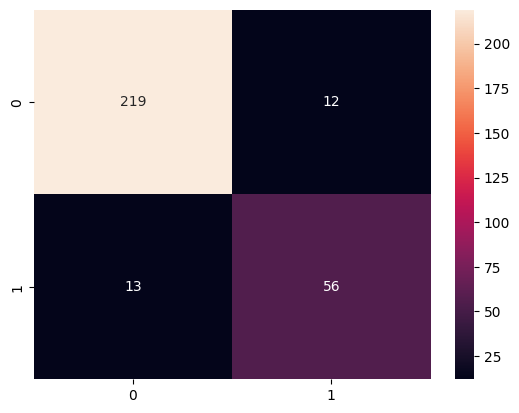

In [ ]:
# Train a logistic regression model.
model_logistic = LogisticRegression()
model_logistic.fit(X_train_logistic, y_train_logistic)

# Make predictions on the test set.
y_pred_logistic = model_logistic.predict(X_test_logistic)

# Evaluate the logistic regression model using accuracy and confusion matrix.
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
f1_score_logistic = f1_score(y_test_logistic, y_pred_logistic)
cm_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)

print(f"Logistic Regression Accuracy: {round(accuracy_logistic,3)}")
print(f"Logistic Regression F1 Score: {round(f1_score_logistic,3)}")
print("Logistic Regression Confusion Matrix:")
sns.heatmap(cm_logistic, annot=True, fmt='d')
plt.show()

# 2 Bike sharing prediction

## 2.1 Load data

Dataset Features
* record_id
* date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* year (0: 2011, 1:2012)
* month ( 1 to 12)
* hour (0 to 23)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weather_situation :
 * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 *2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 *3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* humidity: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

(source: [ics.uci.edu](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset))

In [ ]:
#Load data and improve column readability:

url = 'https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip'
response = requests.get(url)

with ZipFile(BytesIO(response.content)) as zip_file:
    df_raw = pd.read_csv(zip_file.open('hour.csv'))

df_raw = df_raw.rename(columns={"instant": "record_id", "dteday": "date", "yr": "year", "mnth": "month", "hr": "hour", "weathersit": "weather_situation", "hum": "humidity", "cnt": "count"})

df_raw.head().T

,0,1,2,3,4
record_id,1,2,3,4,5
date,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,1,1,1,1,1
year,0,0,0,0,0
month,1,1,1,1,1
hour,0,1,2,3,4
holiday,0,0,0,0,0
weekday,6,6,6,6,6
workingday,0,0,0,0,0
weather_situation,1,1,1,1,1


## 2.2 Exploratory Data Analysis (EDA)

### 2.2.1 Initial steps

**Clean and prepare the data for exploration and modeling:** handle duplicates, missing values, ensure the correct type (numerical/categorical), drop columns which are not useful (including date)

In [ ]:
# Look for duplicates
df_raw.duplicated().sum()

0

In [ ]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
record_id,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weather_situation,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [ ]:
#look for missing values
df_raw.isna().sum()

,0
record_id,0
date,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
workingday,0
weather_situation,0


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_situation  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  count              173

In [ ]:
df = df_raw.drop(columns=['record_id', 'date'])



In [ ]:
u = df.nunique()
# Convert to DataFrame for better visualization
unique_values_df = pd.DataFrame({'Feature': u.index, 'Unique_Values': u.values})

unique_values_df


,Feature,Unique_Values
0,season,4
1,year,2
2,month,12
3,hour,24
4,holiday,2
5,weekday,7
6,workingday,2
7,weather_situation,4
8,temp,50
9,atemp,65


In [ ]:
#change int columns to categories where needed:
category_columns = ['season','year','month', 'hour', 'holiday', 'weekday', 'workingday', 'weather_situation']
for col in category_columns:
    df[col] = df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             17379 non-null  category
 1   year               17379 non-null  category
 2   month              17379 non-null  category
 3   hour               17379 non-null  category
 4   holiday            17379 non-null  category
 5   weekday            17379 non-null  category
 6   workingday         17379 non-null  category
 7   weather_situation  17379 non-null  category
 8   temp               17379 non-null  float64 
 9   atemp              17379 non-null  float64 
 10  humidity           17379 non-null  float64 
 11  windspeed          17379 non-null  float64 
 12  casual             17379 non-null  int64   
 13  registered         17379 non-null  int64   
 14  count              17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.

### 2.2.2 Identify patterns and relationships

**Explore the data:** what are the peak hours during workdays/non-working days? do rentals increase during holidays? are the answers the same for registered and casual users? What is the impact of weather on rentals? months? seasons? etc'. Is there correlation between pairs of numerical feature? a feature and target?

If two features are highly correlated, consider removing one of them.

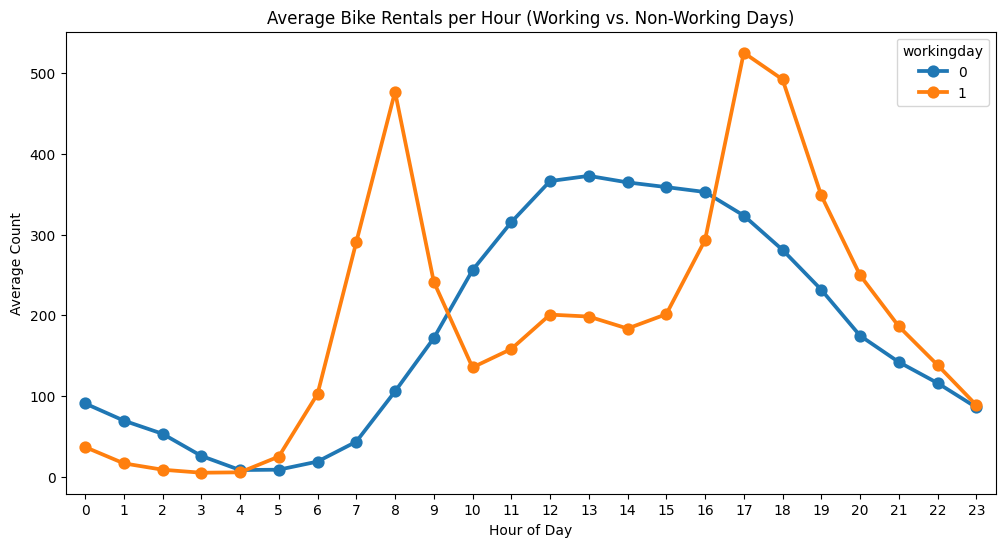

In [ ]:
# plot average  'count' per hour of day, for working day and non working days.

# Group data by hour and working day status, then calculate the average count.
hourly_counts = df.groupby(['hour', 'workingday'], observed=False)['count'].mean().reset_index()

# Create the pointplot.
plt.figure(figsize=(12, 6))
sns.pointplot(x='hour', y='count', hue='workingday', data=hourly_counts)
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.title('Average Bike Rentals per Hour (Working vs. Non-Working Days)')
plt.show()


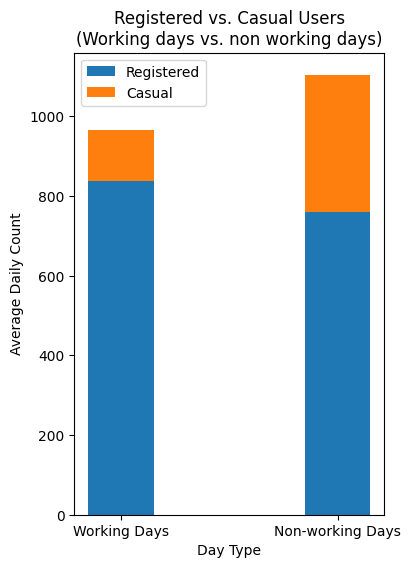

In [ ]:
# One plot with two stacked bars. first stacked bar is average daily count of
# registered and casual, for working days. second bar is the same for non
# working day

# Create the stacked bar plot.
plt.figure(figsize=(4, 6))

# Calculate average daily counts for working days
workingday_counts = df[df['workingday'] == 1].groupby('weekday', observed=False)[['registered', 'casual']].mean().sum()

# Calculate average daily counts for non-working days
non_workingday_counts = df[df['workingday'] == 0].groupby('weekday', observed=False)[['registered', 'casual']].mean().sum()


# Plotting the stacked bar chart
labels = ['Working Days', 'Non-working Days']
registered_values = [workingday_counts['registered'], non_workingday_counts['registered']]
casual_values = [workingday_counts['casual'], non_workingday_counts['casual']]

width = 0.30

plt.bar(labels, registered_values, width, label='Registered')
plt.bar(labels, casual_values, width, bottom=registered_values, label='Casual')


plt.xlabel('Day Type')
plt.ylabel('Average Daily Count')
plt.title('Registered vs. Casual Users\n(Working days vs. non working days)')
plt.legend()
#plt.show()


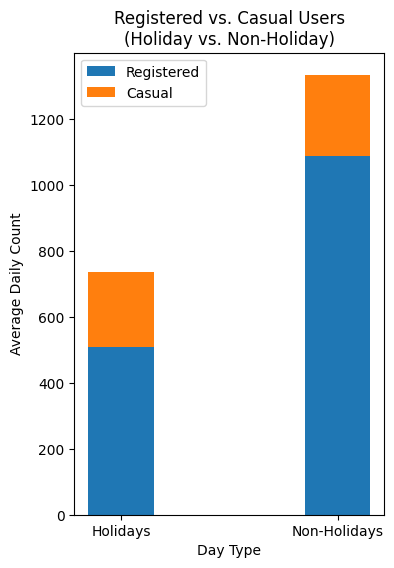

In [ ]:
plt.figure(figsize=(4, 6))

# Calculate average daily counts for holidays
holiday_counts = df[df['holiday'] == 1].groupby('weekday', observed=False)[['registered', 'casual']].mean().sum()

# Calculate average daily counts for non-holidays
non_holiday_counts = df[df['holiday'] == 0].groupby('weekday', observed=False)[['registered', 'casual']].mean().sum()

# Plotting the stacked bar chart
labels = ['Holidays', 'Non-Holidays']
registered_values = [holiday_counts['registered'], non_holiday_counts['registered']]
casual_values = [holiday_counts['casual'], non_holiday_counts['casual']]

width = 0.30

plt.bar(labels, registered_values, width, label='Registered')
plt.bar(labels, casual_values, width, bottom=registered_values, label='Casual')

plt.xlabel('Day Type')
plt.ylabel('Average Daily Count')
plt.title('Registered vs. Casual Users\n(Holiday vs. Non-Holiday)')
plt.legend()
plt.show()


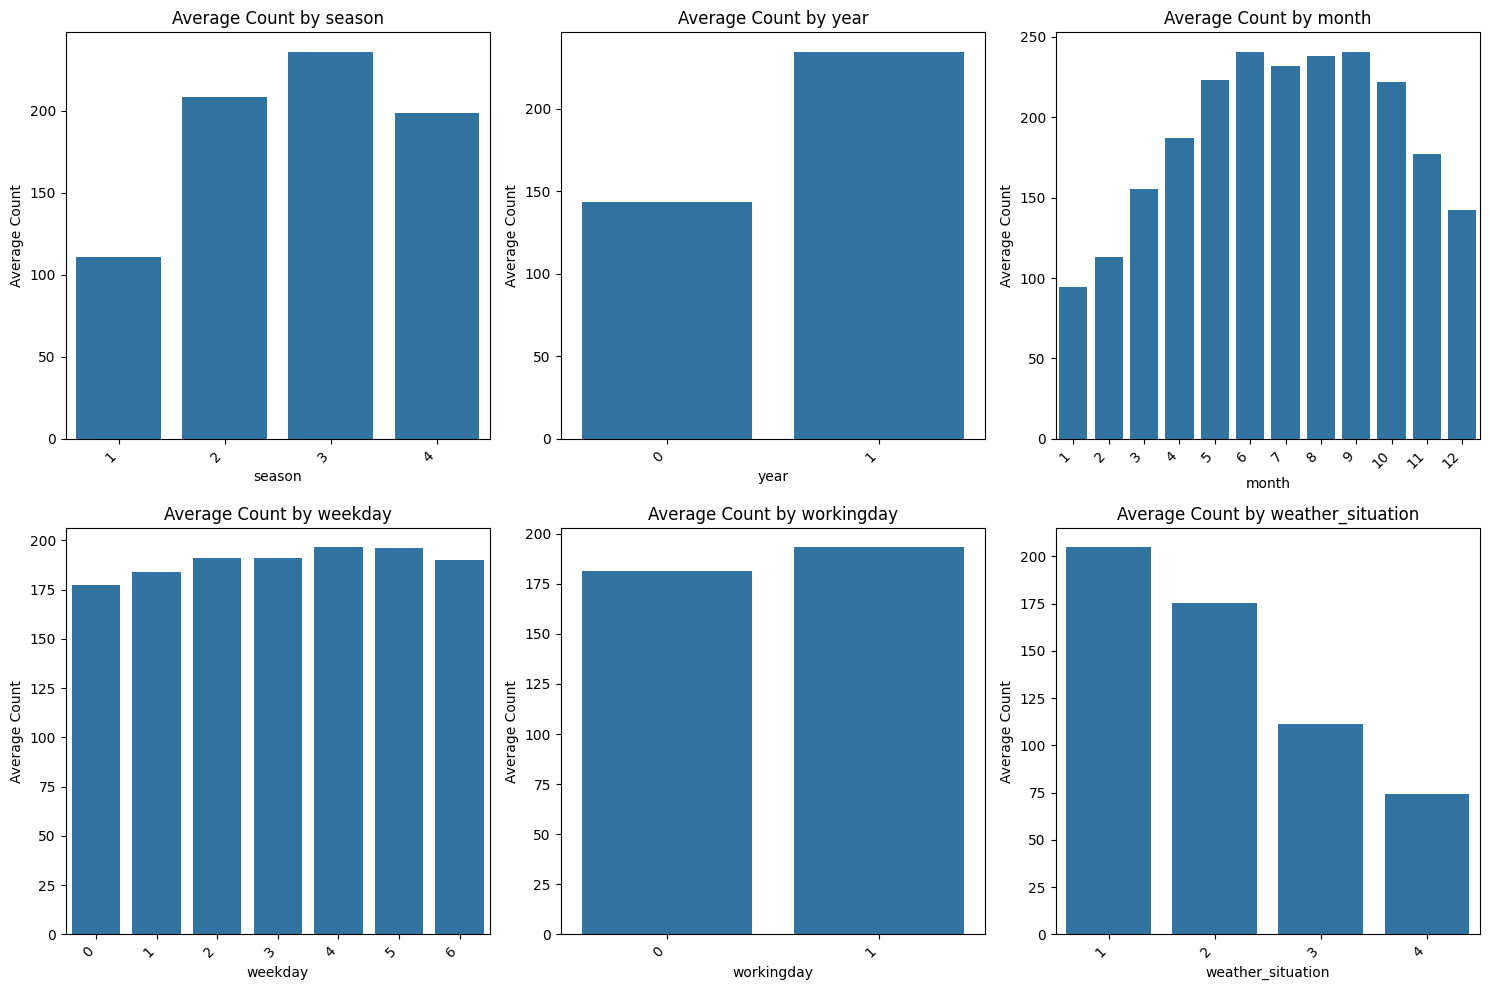

In [ ]:
categorical_features = ['season', 'year', 'month', 'weekday', 'workingday', 'weather_situation']
num_plots = len(categorical_features)
num_cols = 3
num_rows = 2

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size as needed

for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)

    # Calculate average count for each category
    average_counts = df.groupby(feature, observed=False)['count'].mean().reset_index()

    # Create bar plot
    sns.barplot(x=feature, y='count', data=average_counts)
    plt.xlabel(feature)
    plt.ylabel('Average Count')
    plt.title(f'Average Count by {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Features and correlations sorted by 'count':
count        1.000000
temp         0.404772
atemp        0.400929
windspeed    0.093234
humidity    -0.322911
Name: count, dtype: float64


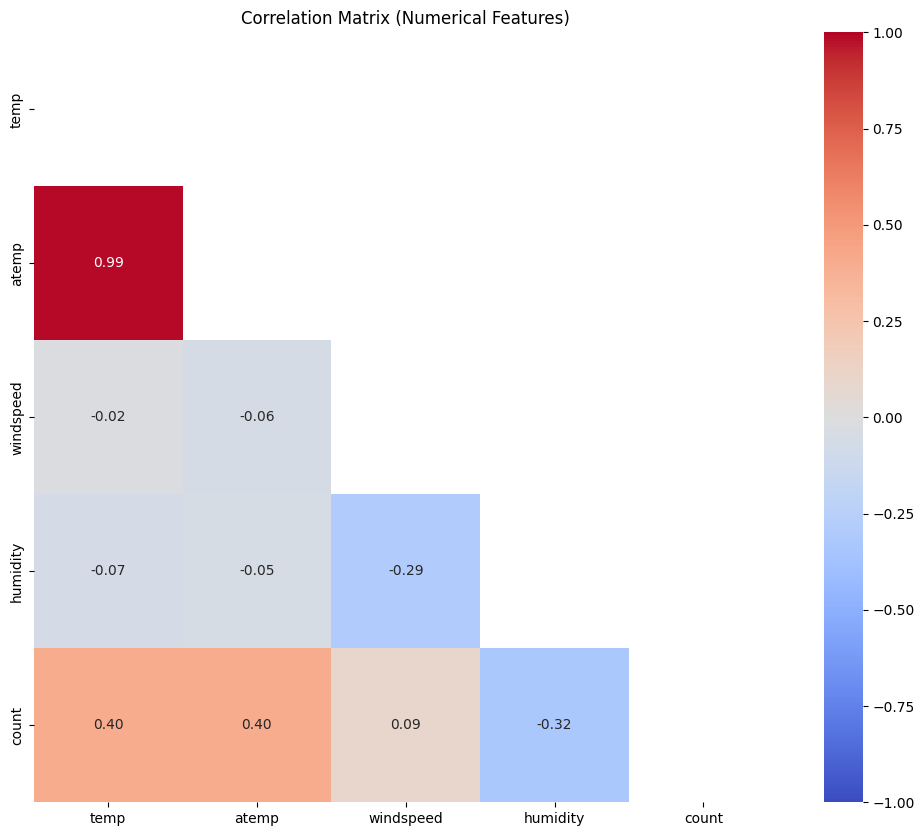

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code
numerical_features = ['temp','atemp','windspeed','humidity','count']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Sort the features by correlation with 'count' (or another target if needed)
correlation_with_target = correlation_matrix['count'].sort_values(ascending=False)
print("Features and correlations sorted by 'count':")
print(correlation_with_target)

# Create a heatmap of the correlation matrix (below diagonal)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


EDA Insights:
1. Peak rental hours differ between working and non-working days (commute vs. noon)
2. The ratio of casual users increase on non-working days
3. Rentals are affected by weather, with lower counts during poor weather.
4. Seasonality impacts bike rentals significantly. May-Oct. show higher numbers
5. Temperature and feeling temperature show a high correlation.
6. There's a positive correlation between 'count' and temperature.
7. 'humidity' shows some negative correlation with the target variable.
8. Holidays have a notable impact on bike rentals, with a decrease compared to non-holidays.

## 2.3 Build a regression model
1. Since 'casual' and 'registered' are not known in advance, exclude them from from the feature set.
2. Create a training-test sets with ratio of 80%-20%
3. Train and calculate RMSE performace of: Linear Regression, Decision Tree Regressor, XGBoost Regressor and Random Forest Regressor (use default settings). Which algorithm yields the best performance?
4. use CV grid-search to tune the best performing model.

Bonus:
1. plot a historgram of predicted values of Linear Regression model. Are all predictions positive?
2. To ensure positive predictions, log-transform the target i.e., train the model to predict np.log1p(y) instead of y (but do not forget to transform the prediction back before comparing it to y). Does the performance improve?
3. plot two plots to visualize the error residual per prediction, with and without log-transformation. The x-axis of the plot is predictions, the y-axis is Error residual (y-y_pred). where is the variance of error smaller?



In [ ]:
X = df.drop(columns=['count', 'casual', 'registered', 'atemp'])
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# One-hot encode categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Initialize and train the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f"{name} RMSE: {rmse}")

# Now with log(count)
y_train_log = np.log1p(y_train)  # Log transform the target variable
y_test_log = np.log1p(y_test)

results_log = {}

for name, model in models.items():
    model.fit(X_train, y_train_log)
    y_pred_log = model.predict(X_test)
    # Inverse log transform the predictions for RMSE calculation
    y_pred = np.expm1(y_pred_log)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results_log[name] = rmse
    print(f"{name} RMSE (log transformed target): {rmse}")


Linear Regression RMSE: 100.50203842042457
Decision Tree Regressor RMSE: 73.24488233103386
XGBoost Regressor RMSE: 49.757571463735545
Random Forest Regressor RMSE: 51.27279709436205
Linear Regression RMSE (log transformed target): 95.1302432668442
Decision Tree Regressor RMSE (log transformed target): 80.07105949386148
XGBoost Regressor RMSE (log transformed target): 49.59276050525167
Random Forest Regressor RMSE (log transformed target): 57.54511984312424


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE with best XGBoost model: {rmse}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE: 49.44467789231719
Test RMSE with best XGBoost model: 47.29061064808479


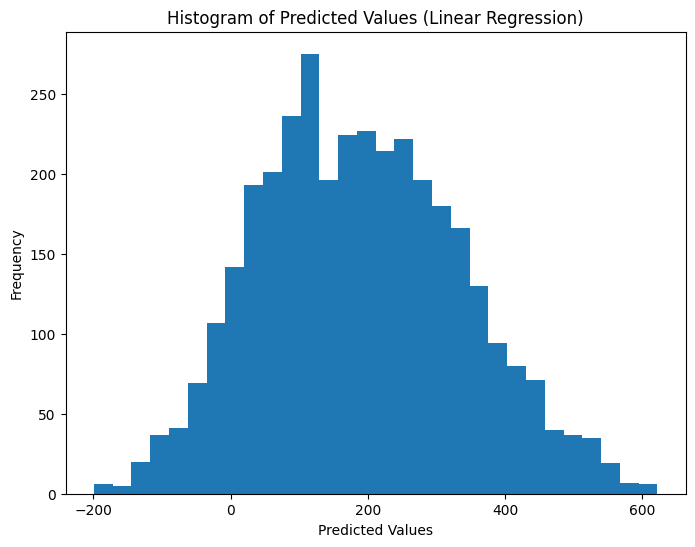

In [ ]:
# Plot histogram of predicted values
y_pred_linear = LinearRegression().fit(X_train,y_train).predict(X_test)

plt.figure(figsize=(8, 6))
plt.hist(y_pred_linear, bins=30)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values (Linear Regression)')
plt.show()

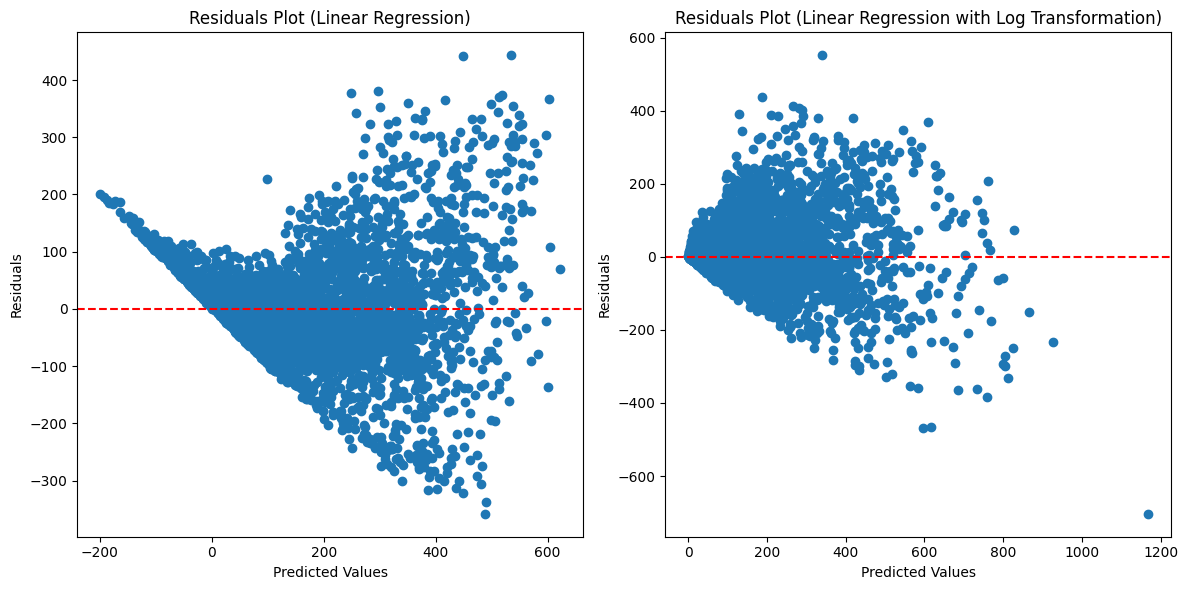

In [ ]:
# Calculate residuals for the linear regression model without log transformation
residuals_linear = y_test - y_pred_linear

# Calculate residuals for the linear regression model with log transformation
y_pred_linear_log = np.expm1(LinearRegression().fit(X_train, y_train_log).predict(X_test))
residuals_linear_log = y_test - y_pred_linear_log


# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_linear, residuals_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Linear Regression)')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_linear_log, residuals_linear_log)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Linear Regression with Log Transformation)')

plt.tight_layout()
plt.show()
